<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/master/Death_Grodno_Data_prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install colorama
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
%matplotlib inline
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier
!pip install h2o
import h2o
h2o.init()
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OSupportVectorMachineEstimator
from h2o.grid.grid_search import H2OGridSearch




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



     |████████████████████████████████| 65.7MB 88kB/s 
     |████████████████████████████████| 164.6MB 90kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670979 sha256=e1c4c8ce90cd3d7f86975cfa1e88ff710972d9bd00b83de2e007fadb7cd84c03
  Stored in directory: /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnatnxux0
  JVM stdout: /tmp/tmpnatnxux0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnatnxux0/h2o_unknownUser_started_from_python.err
  S

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_6icdtr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [2]:
import pandas as pd

In [136]:
df = pd.read_csv('/content/Город списки 2015.csv',header=0,
                  encoding= 'unicode_escape',
                 sep=';', error_bad_lines=False)
df.head()

,Ìåñÿö,íåäåëÿ,¹ ï/ï,¹ ïî íåäåëüíî,êåì âûäàíà ñïðàâêà,Ôàìèëèÿ È Î,ïîë,äàòà ðîæäåíèÿ,Äàòà ñìåðòè,Ìåñòî ñìåðòè,óëèöà,¹ äîìà,äèàãíîç,êîä,ìåñòî ðàáîòû,îäèíîêîïðîæèâàþùèå,ÄÒÏ,ïîëèêëèíèêè,âîçðàñò,âîçðàñòíîé ïðîìåæóòîê,òðóäîñïîñîáíîñòü,Ðàéîí,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,1,1-8,1.0,1,ïàò,àâãóñòèíîâè÷ ÷åñëàâ èâàíîâè÷,ì,25.04.1951,05.01.2015,ãîêá,áðèêåëÿ,3-31,âíóòðèìîçãîâîå êðîâîèçëèÿíèå,i61.0a,NaN,NaN,NaN,6,63,60-64,ïåíñ,ëåí,NaN,NaN,NaN
1,1,1-8,2.0,2,ñìý,áàðàáàí íèêîëàé íèêîëàåâè÷,ì,01.11.1970,04.01.2015,äîìà,êîìàðîâà,28-9,î.ýòèëîâûì ñïèðòîì,t51.0,NaN,NaN,NaN,4,44,40-49,òðóä,ëåí,NaN,NaN,NaN
2,1,1-8,3.0,3,6,áóêèí âèêòîð äìèòðèåâè÷,ì,24.07.1940,30.12.2015,äîìà,ìàëûùèíñêàÿ,12-8,ìèåëîôèáðîç,c94.7,NaN,NaN,NaN,6,75,75-79,ïåíñ,ëåí,NaN,NaN,NaN
3,1,1-8,4.0,4,ñìý,âàñèëåâè÷ àëåêñàíäð âëàäèìèðîâè÷,ì,17.11.1970,02.01.2015,äîìà,áëê,34-113,î.îòðàâëåíèå àëêîãîëÿ,t51.0,NaN,NaN,NaN,1,44,40-49,òðóä,ëåí,êàðäèìèîïàòèÿ,i42.6,NaN
4,1,1-8,5.0,5,ñìý,âàñèëþê ìàêñèì ëåîíèäîâè÷,ì,03.04.1993,02.01.2015,â äð.ìåñòå,í.îðäû,20à-134,"ñî÷åòàíàÿ òóïàÿ òðàâìà ãîëâû, ãð.êë è æèâîòà ñ...",t06.8,NaN,NaN,NaN,2,21,18-29,òðóä,îêò,NaN,NaN,NaN


In [106]:
#df = df.dropna()

In [46]:
df = df.iloc[:2610, :12]

In [137]:
df['Äàòà ñìåðòè'] = df['Äàòà ñìåðòè'].map(lambda x:str(x))

In [138]:
df['Äàòà ñìåðòè'] = df['Äàòà ñìåðòè'].map(lambda x: x == '11.01.2017' if x ==' 11.07.1996'else x)

In [139]:
def s(x):
  return x.lstrip()

In [140]:
df['Äàòà ñìåðòè'] = df['Äàòà ñìåðòè'].apply(s)

In [158]:
df[df['Äàòà ñìåðòè'] == '--.09.2015']

,Ìåñÿö,íåäåëÿ,¹ ï/ï,¹ ïî íåäåëüíî,êåì âûäàíà ñïðàâêà,Ôàìèëèÿ È Î,ïîë,äàòà ðîæäåíèÿ,Äàòà ñìåðòè,Ìåñòî ñìåðòè,óëèöà,¹ äîìà,äèàãíîç,êîä,ìåñòî ðàáîòû,îäèíîêîïðîæèâàþùèå,ÄÒÏ,ïîëèêëèíèêè,âîçðàñò,âîçðàñòíîé ïðîìåæóòîê,òðóäîñïîñîáíîñòü,Ðàéîí,Unnamed: 22,Unnamed: 23,Unnamed: 24
2063,9,1-10,2072.0,22,ñìý,íàãàéöåâà ëþáîâü ãåííàäüåâíà,æ,20.09.1953,--.09.2015,äîìà,ôîëþø,15/204-135,àáñ,i25.1a,NaN,NaN,NaN,2,61,60-64,ïåíñ,îêò,NaN,NaN,NaN


In [159]:
df = df.drop([2063])

In [160]:
df['Äàòà ñìåðòè'] = pd.to_datetime(df['Äàòà ñìåðòè'],format='%d.%m.%Y' )


In [19]:
df['Äàòà ñìåðòè'] = df['Äàòà ñìåðòè'].map(lambda x: x == '--.05.2017' if x =='11.05.2017'else x)

In [122]:
df.head()

,Ìåñÿö,íåäåëÿ,¹ ïî íåäåëüíî,êåì âûäàíà ñïðàâêà,Ôàìèëèÿ È Î,ïîë,äàòà ðîæäåíèÿ,Äàòà ñìåðòè,Ìåñòî ñìåðòè,óëèöà,¹ äîìà,äèàãíîç,êîä,ìåñòî ðàáîòû,îäèíîêîïðîæèâàþùèå,ÄÒÏ,ïîëèêëèíèêè,âîçðàñò,âîçðàñòíîé ïðîìåæóòîê,òðóäîñïîñîáíîñòü,Ðàéîí,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,1-6,1,3,áåñïàëîâà íàäåæäà âëàäèìèðîâíà,æ,16.03.1949,2016-01-03,äîìà,êàáÿêà,8/2-84,ñîñóäèñòàÿ äåìåíöèÿ,f01.9,NaN,NaN,NaN,3,66,65-69,ïåíñ,îêò,NaN,NaN,NaN
1,1,1-6,2,5,ãðåñü ñòàíèñëàâà êóïðèÿíîâíà,æ,27.04.1926,2016-01-04,äîìà,ïîäîëüíàÿ,84,àáñ,i25.1a,NaN,NaN,NaN,5,89,80 è ñò,ïåíñ,îêò,NaN,NaN,NaN
2,1,1-6,3,4,çàìèðîâñêàÿ ëåîíèëà àëåêñàíäðîâíà,æ,12.05.1935,2016-01-04,äîìà,äîìáðîâñêîãî,55-26,àáñ,i25.1a,NaN,NaN,NaN,4,80,80 è ñò,ïåíñ,ëåí,NaN,NaN,NaN
3,1,1-6,4,ñìý,èâàøêåâè÷ âÿ÷åñëàâ ìàðüÿíîâè÷,ì,21.10.1976,2016-01-02,äîìà,äîìáðîâñêîãî,57-23,îòðàâëåíèå ýòèë.ñïèðòîì,t51.0,íå ðàáîòàåò,NaN,NaN,4,39,30-39,òðóä,ëåí,NaN,NaN,NaN
4,1,1-6,5,ïàò,èîäêîâñêèé èâàí ñòàíèñëàâîâè÷,ì,12.12.1953,2016-01-04,ãîêêö,ñîêîëüñêàÿ,22-9,î.èíô.ïåðåä.ñòåíêè ìèàêàðäà,i21.0a,NaN,NaN,NaN,2,62,60-64,ïåíñ,îêò,NaN,NaN,NaN


In [161]:

df_ = df.loc[:,:'Äàòà ñìåðòè' ]

In [162]:

df_ = df_.loc[:,'ïîë':]

In [163]:
df_ = df_.rename(columns={'ïîë':'Sex', 'äàòà ðîæäåíèÿ':'Birthday', 'Äàòà ñìåðòè': "Death"}
    
)

In [164]:
df_['Sex'] = df_['Sex'].map({'æ': 'male', 'ì': 'female' })

In [165]:
df_.head()

,Sex,Birthday,Death
0,female,25.04.1951,2015-01-05
1,female,01.11.1970,2015-01-04
2,female,24.07.1940,2015-12-30
3,female,17.11.1970,2015-01-02
4,female,03.04.1993,2015-01-02


In [81]:
df_[df_['Birthday'] == '1939']

,Sex,Birthday,Death
770,male,1939,2017-03-04


In [166]:
df_.to_csv('Dirty_2015.csv')

In [ ]:
df_['Birthday']  =  pd.to_datetime(df_['Birthday'],format='%d.%m.%Y' )

In [167]:
df_ = df_.set_index('Death')

In [168]:
# NO! All are unique
df_.index.is_unique

False

In [169]:
lst = df_.index

In [170]:
dct={}
for i in lst:
  dct[i] = dct.get(i, 0) + 1

In [171]:
dct.keys()

dict_keys([Timestamp('2015-01-05 00:00:00'), Timestamp('2015-01-04 00:00:00'), Timestamp('2015-12-30 00:00:00'), Timestamp('2015-01-02 00:00:00'), Timestamp('2015-01-06 00:00:00'), Timestamp('2014-12-31 00:00:00'), Timestamp('2015-01-01 00:00:00'), Timestamp('2015-01-03 00:00:00'), Timestamp('2014-12-30 00:00:00'), Timestamp('2015-01-07 00:00:00'), Timestamp('2015-01-11 00:00:00'), Timestamp('2015-01-10 00:00:00'), Timestamp('2015-01-12 00:00:00'), Timestamp('2015-01-09 00:00:00'), Timestamp('2015-01-13 00:00:00'), Timestamp('2015-01-08 00:00:00'), Timestamp('2014-12-22 00:00:00'), Timestamp('2014-12-12 00:00:00'), Timestamp('2015-01-14 00:00:00'), Timestamp('2015-01-15 00:00:00'), Timestamp('2015-01-18 00:00:00'), Timestamp('2015-01-17 00:00:00'), Timestamp('2015-01-16 00:00:00'), Timestamp('2015-01-19 00:00:00'), Timestamp('2015-01-20 00:00:00'), Timestamp('2015-01-27 00:00:00'), Timestamp('2015-01-22 00:00:00'), Timestamp('2015-01-25 00:00:00'), Timestamp('2015-01-26 00:00:00'), Tim

In [172]:
l1 = dct.keys()
l2 = dct.values()

In [173]:
dd = pd.DataFrame({'Time': l1, 'Amount':l2
    }, )

In [174]:
dd.to_csv('2015_death.csv')

In [175]:
df1 = pd.read_csv('/content/2015_death.csv')
df2 = pd.read_csv('/content/2016_death.csv')

df3 = pd.read_csv('/content/2017_death.csv')

In [176]:
ddff = df1.append(df2)

In [177]:
ddff = ddff.append(df3)

In [179]:
ddff = ddff.set_index('Time')

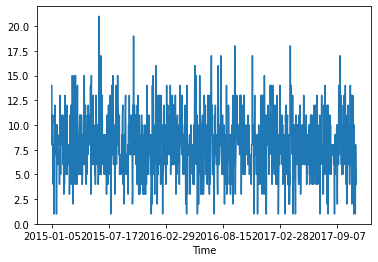

In [183]:

# makes the plot and assign it to a variable
ff = ddff['Amount'].plot()

In [184]:
ff.to_csv('final_data_death.csv')

AttributeError: ignored

In [ ]:
import numpy as np
import os
import pandas as pd
import glob
import string
import nltk
import re
class Utils():
    """
    классе происходит отсеивание невалидных документов,
    которые не удалось адекватно прочитать.

    На выходе получаем список валидно прочитанных файлов
    """
    
    root_directory = os.chdir('/content/drive/MyDrive/parser')# input path
    list_of_files = glob.glob('**/*.txt', recursive=True)
    invalid_parsing = []
    trash = ['Волковыск-1.txt','Волковыск.txt','Вороново-1.txt',
         'Вороново.txt', 'Черновик-1.txt', 'Черновик.txt']
    for file in list_of_files:
        try:
             with open(file, encoding='utf-8') as f:
                    num = f.readline()
                    file_ = f.read()
                    if num and file_:
                        pass
        except:
            invalid_parsing.append(file)
    for i in invalid_parsing:
        list_of_files.remove(i)
    for i in trash: 
        list_of_files.remove(i)


list_of_files = Utils.list_of_files

In [ ]:
plt_ = [] # Список для показателя "Тромбоциты"
wbc_ = [] # Список для "Лейкоцитов"
hgb_ = [] #Список для "Гемоглобина"
crea_ = [] #Список для "Креатинина"
ldh_ = []#Список для "Лактатдегидрогеназы"
sex_ = []#Список для "Пола"
crp_ = []#Список для "С-реактивного протеина"
tr = []#Список для "Лечения"
bir = []#Список для "Даты рождения"
ad = []#Список для "Даты поступления"
dis = []#Список для "Даты выписки"
ID_ = []#Список для "№ эпикриза"
dgs_ = []#Список для "Диагноза"
rf_ = []#Список для "Дыхательный недостаточности"
alt_ = []#Список для "Аланинтрансаминазы"
ast_ = []#Список для "Аспартаттрансаминазы"
pct_ = []#Список для "Прокальцитонина"
esr_ = []#Список для "Скорости оседания эритроцитов"
fibrin_ = []#Список для "Фибриногена"

In [ ]:
def esr(file_):
  file_ = ''.join(file_.split()).lower()
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  patt = re.compile(r'(?<=соэ)\d+')
  patt1 = patt.findall(file_)
  try:
    if patt1:
      return np.float_(patt1)
    else:
      return 'None'
  except:
    pass

def fibrn(file_):
  file_ = ''.join(file_.split()).lower()
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r',', '.', file_)
  patt = re.compile(r'(?:фибриноген|фибр\.|фибрин|ф)(\d+.\d+)')
  patt1 = patt.findall(file_)
  try:
    if patt1:
      return np.float_(patt1)
    else:
      return 'None'
  except:
    pass


def ID(num):
  """returns ID of the patient"""
  for i in num.split():
    for char in i.split():
        if char.isnumeric():
            try:
                return int(char)
            except:
                return 'None'
            
            
def treatment(file_):
  """ returns srting of remedies used for the patient """
  for line in file_.split('\n'):
    if re.search('Провед.нное.лечение', line):  
        return(line.replace('Проведенное лечение:', \
                            '').replace('ЛФК', '').replace('ФТЛ', ''))
    

def born_adm_disch(file_):
    """ finds all nessesary dates in the epicrisis"""
    pattern = re.compile("(\d{2}).(\d{2}).(\d{4})") # check all dates
    birthday, admission = pattern.findall(file_)[:2]
    discharging = pattern.findall(file_)[-1]
    try:
        return ':'.join(birthday), ':'.join(admission), ':'.join(discharging)
    except:
        return 'None'


pattern_diagnosis = ['Диагноз:','Диагноз клинический:','Диагноз', 'Д-з:',
                     "Диагноз заключительный:"]
def diagnosis_dirty(file_):
  int_ = 0
  for i in file_.split():
    int_ += 1
    if i in pattern_diagnosis:
      return file_.split()[int_+1:int_+40]    
  

def crp(file_):
  """returns all crp values"""
  file_= ''.join(file_.split())
  file_ = re.sub(r'[ЦСC]РБ|\w\D(реактив.|реакт.|реак.)белок', 'С-реактивныйбелок', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'(?<!С-реактивныйбелок)\d\d\.\d\d', '', file_)
  file_ = re.sub(r',', '.', file_)
  pattern_1 = re.compile(r'(?:\w\Dреактивныйбелок|\w\Dреактивныйбелокдо)(\d*\.\d+|\d+)')
  pattern_2 = pattern_1.findall(file_)
  try:
    if pattern_2:
      return np.float_(pattern_2)
    else:
      return 'None'
  except:
    pass


def gender(file_):
  file_ = file_.title()
  file_ = ''.join(file_.split())
  file_ = re.sub(r'Диагноз.*', '', file_)
  patt1 = re.compile(r'[А-Я](\w{,19}(\w|\ич))[А-Я]\w{,20}(вна)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return 'female'
    else:
      return 'male'
  except:
    pass
  

def ldh(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\wактатдегидрогеназ\w', 'лдг', file_)
  file_ = re.sub(r'(?<!лдг)\d\d\.\d\d', '', file_)
  patt1 = re.compile(r'(?<=лдг)\d{,4}')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass



def cre(file_):
  """Returns all creatinine values"""
  file_= ''.join(file_.split())  
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'(\wреатини\w|креатин|креат)(?![а-яА-Я,])', 'cre', file_)
  file_ = re.sub(r'(?<!cre)\d\d\.\d\d', '', file_)
  patt1 = re.compile(r'(?<=cre)\d{2,3}')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass


def hgb(file_):
  """returns list of str with level of hemoglobin"""
  file_= ''.join(file_.split())  
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  patt = re.compile(r'гемоглобин|гемогл|гб|гем')
  patt1 = re.sub(patt, r'hgb', file_)
  patt2 = re.compile(r'(?<=hgb)\d{2,3}')
  all_hgb = patt2.findall(patt1)
  try:
    if all_hgb:
      return np.float_(all_hgb)
    else:
      return 'None'
  except:
    pass


def wbc(file_):
  """returns list of str with level of wbc"""
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'10(\*|[еe])9', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\Dбщийанализкрови', 'оак', file_)
  file_ = re.sub(r'(?<=оак)гб\d*,', '', file_)
  file_ = re.sub(r',', '.', file_)
  patt1 = re.compile(r'(?<=оак|wbc)(?:л|лейкоцит\w)(\d*\.\d+|\d+)')
  all_wbc = patt1.findall(file_)
  try:
    if all_wbc:
      return np.float_(all_wbc)
    else:
      return 'None'
  except:
    pass


def plt(file_):
  """returns list of str with level of plt"""
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'10(\*|[еe])9', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  patt1 = re.compile(r'\wромбоцит\w|(?<![а-яА-Я])тр(?![а-яА-Я])')
  file_ = re.sub(patt1, r'plt', file_)
  file_ = re.sub(r'(?<!plt)\d\d\.\d\d', '', file_)
  patt2 = re.compile(r'(?<=plt)\d{3}')
  all_plt = patt2.findall(file_)
  try:
    if all_plt:
      return np.float_(all_plt)
    else:
      return 'None'
  except:
    pass


def rf(file_):
  file_= ''.join(file_.split())  
  file_ = re.sub(r'[а-яА-ЯёЁ]ДН[^Шш0-9]', 'ДН'.lower(), file_)
  file_ = re.sub(r'(?<=ДН)[1iI]{3}|[Шш]', '3', file_)
  file_ = re.sub(r'(?<=ДН)[1iI]{2}|1-2', '2', file_)
  file_ = re.sub(r'(?<=ДН)[оoОO]', '0', file_)
  patt1 = re.compile(r'(?<=ДН)\d')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return patt2
    else:
      return 0
  except:
      return 0



def alt(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\wланинаминотрансфераз\w|алат', 'алт', file_)
  file_ = re.sub(r'(?<!алт)\d\d\.\d\d', '', file_)
  file_ = re.sub(r',', '.', file_) 
  patt1 = re.compile(r'(?<=алт)(\d*\.\d+|\d+)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass


def ast(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'[():]', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}', '', file_)
  file_ = re.sub(r'\wспартатаминотрансфераз\w|асат', 'аст', file_)
  file_ = re.sub(r'(?<!аст)\d\d\.\d\d', '', file_)
  file_ = re.sub(r',', '.', file_)
  patt1 = re.compile(r'(?<=аст)(\d*\.\d+|\d+)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass


def pct(file_):
  file_= ''.join(file_.split())
  file_ = file_.lower()
  file_ = re.sub(r'(?<=\,\d)\,|\.\d{2}\.\d\d\.\d{2,4}.', '', file_)
  file_ = re.sub(r'\d{,2}\.\d\d\.\d{2,4}(\.|)', '', file_)
  file_ = re.sub(r'[–-]|[():<>=]', '', file_)
  file_ = re.sub(r'менее', '', file_)
  file_ = re.sub(r'от', '', file_)
  file_ = re.sub(r'(\wрокальцитони\w|прокальцитон|прокальцит|прокальц|рст)(?![а-яА-Я,])', 'pct', file_)
  file_ = re.sub(r',', '.', file_)
  patt1 = re.compile(r'(?<=pct)(\d*\.\d+|\d+)')
  patt2 = patt1.findall(file_)
  try:
    if patt2:
      return np.float_(patt2)
    else:
      return 'None'
  except:
    pass

In [ ]:
for file in list_of_files:
    try:
         with open(file, encoding='utf-8') as f:
                num = f.readline()
                file_ = f.read()
                ID_.append(ID((num)))
                tr.append(treatment((file_)))
                bir.append(born_adm_disch(file_)[0])
                ad.append(born_adm_disch(file_)[1])
                dis.append(born_adm_disch(file_)[2])
                dgs_.append(diagnosis_dirty((file_)))
                crp_.append(crp(file_))
                sex_.append(gender(file_))
                ldh_.append(ldh(file_))
                crea_.append(cre(file_))
                hgb_.append(hgb(file_))
                wbc_.append(wbc(file_))
                plt_.append(plt(file_))
                rf_.append(rf(file_))
                alt_.append(alt(file_))
                ast_.append(ast(file_))
                pct_.append(pct(file_))
                esr_.append(esr(file_))
                fibrin_.append(fibrn(file_))
    except:
        print('stp')

In [ ]:
fibrin_[200:400]

In [ ]:
diagnosis_cleaned =  []
for diagnos in dgs_:
    try:
        diagnosis_cleaned.append(' '.join(diagnos))
    except:
        diagnosis_cleaned.append('None')
        
        
        
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))





list_wo_punct = []
for sent in diagnosis_cleaned:
    try:
        sent = remove_punctuation(sent.lower())
        list_wo_punct.append(sent)
    except:
        pass
        


In [ ]:
covid_list = []    
for sent in list_wo_punct:
    pattern = re.sub(r'covid19', 'covid', sent )
    pattern = re.sub(r'коронавирусная', 'covid', pattern)
    pattern = re.sub(r'короновирусная', 'covid', pattern)
    pattern = re.sub(r'b342', 'covid', pattern)
    pattern = re.sub(r'sarscov2', 'covid', pattern)
    pattern = re.sub(r'торсков2', 'covid', pattern)
    pattern_1 = re.compile(r'covid')
    patt_2 = re.search(pattern_1, pattern)
    try:
        covid_list.append(patt_2)
    except:
        pass
    
    
c =[]
#если есть коронавирусная инфекция - 1, иначе - 0
for i in covid_list:
    if not i:
        c.append(0)
    else:
        c.append(1) 

In [ ]:
pn_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'пневмония', 'J18', sent )
    pattern = re.sub(r'пне...ния', 'J18', pattern)
    pattern = re.sub(r'внегоспитальная', 'J18', pattern)
    pattern = re.sub(r'внебольничная', 'J18', pattern)
    pattern_1 = re.compile(r'J18')
    patt_2 = re.search(pattern_1, pattern)
    try:
        pn_list.append(patt_2)
    except:
        pass  
    
    
p = []
# если есть пневмония - 1, иначе - 0
for i in pn_list:
    if not i:
        p.append(0)
    else:
        p.append(1)

In [ ]:
ihd_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'ссн', 'ИБС', sent )
    pattern = re.sub(r'ибс', 'ИБС', pattern)
    pattern = re.sub(r'атеросклеротический', 'ИБС', pattern)
    pattern = re.sub(r'кардиосклероз', 'ИБС', pattern)
    pattern = re.sub(r'фп', 'ИБС', pattern)
    pattern = re.sub(r'фибрил....', 'ИБС', pattern)
    pattern_1 = re.compile(r'ИБС')
    patt_2 = re.search(pattern_1, pattern)
    try:
        ihd_list.append(patt_2)
    except:
        pass  
# итого, обработаны все возможные паттерны    
    
ihd = []

for i in ihd_list:
    if not i:
        ihd.append(0)
    else:
        ihd.append(1)

In [ ]:
dm_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'сд', 'СД', sent )
    pattern = re.sub(r'сах.....', 'СД', pattern)
    pattern = re.sub(r'д.абет', 'СД', pattern)
    pattern_1 = re.compile(r'СД')
    patt_2 = re.search(pattern_1, pattern)
    try:
        dm_list.append(patt_2)
    except:
        pass  
    
dm_ = []

for i in dm_list:
    if not i:
        dm_.append(0)
    else:
        dm_.append(1)


In [ ]:
obes_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'ожир.н..', 'ОЖИРЕНИЕ', sent )
    pattern = re.sub(r'.нжо.', 'ОЖИРЕНИЕ', pattern)
    
    #pattern = re.sub(r'торсков2', 'covid', pattern)
    pattern_1 = re.compile(r'ОЖИРЕНИЕ')
    patt_2 = re.search(pattern_1, pattern)
    #patt_2 = pattern_1.findall(''.join(pattern.split()))
    try:
        obes_list.append(patt_2)
    except:
        pass  
    
ob_ = []

for i in obes_list:
    if not i:
        ob_.append(0)
    else:
        ob_.append(1)

In [ ]:
copd_list = []
for sent in list_wo_punct:
    pattern = re.sub(r'хобл', 'ХОБЛ', sent )
    pattern = re.sub(r'другая обструктивная', 'ХОБЛ', pattern)
    pattern = re.sub(r'j44', 'ХОБЛ', pattern)
    pattern_1 = re.compile(r'ХОБЛ')
    patt_2 = re.search(pattern_1, pattern)
    try:
        copd_list.append(patt_2)
    except:
        pass  


copd_ = []
for i in copd_list:
    if not i:
        copd_.append(0)
    else:
        copd_.append(1)    

In [ ]:
ba_list = []
for sent in list_wo_punct:
  pattern = re.sub(r'бронхиальная', 'БА', sent )
  pattern = re.sub(r'частично контролируемая', 'БА', pattern)
  pattern = re.sub(r'\sба\s', 'БА', pattern )
  pattern = re.sub(r'неконтролируемая', 'БА', pattern )
  pattern_1 = re.compile(r'БА')
  pattern_2 = re.search(pattern_1, pattern)
  try:
    ba_list.append(pattern_2)
  except:
    pass
ba = []
for i in ba_list:
    if not i:
        ba.append(0)
    else:
        ba.append(1)

In [ ]:
# нас интересует самый высокий уроведь ДН, т.к. у пациента при поступлении ДН может быть 2, а при выписке - 0,
# о тяжести пациента мы будем судить по наибольшему значению
rfl = []
for i in rf_:
    if i:
        rfl.append(max(np.float_(i)))
    else:
        rfl.append(0)

In [ ]:
gr_list = []
for sent in list_wo_punct:
  pattern = re.sub(r'среднетяж.л..', '', sent)
  pattern = re.sub(r'ср.тяж.', '', sent)
  pattern = re.sub(r'нетяж.л..', '', pattern)
  pattern_1 = re.compile(r'тяж.л..')
  pattern_2 = re.search(pattern_1, pattern)
  try:
    gr_list.append(pattern_2)
  except:
    pass

In [ ]:
g = []
for i in gr_list:
    if not i:
        g.append(0)
    else:
        g.append(1)

In [ ]:
# задаём словарь, в котором ключ - истинное название препарата, а значения - варианты названий ( коммерческих) и
# названия с ошибками для обработки с помощью регулярных выражений

dict_treatment = {'лизиноприл':'л.з.....ил|лизитар|лизинеоприл', 
                  'цефтриаксон':'три.....ф|цефт.....он|цефтриакосн', 
                   "метопролол":"мет.....ол|эгилок", 
                  "фраксипарин":"фра......ин",
                  'тейкопланин': "тей......ин.",
                  "амброксол": "аброкол|амброко.|амб......|амброксолс|амброкосл|амброксолл|амброксолл|аброксол|амброксолл", 
                  "моксифлоксацин": 'пле....кс.|мокс.......цин',
                  "молсидомин":"м.лсид...н",
                  "спиронолактон":"сп.р.......он.|верош....н",
                 "бисопролол":"б.с.пр..ол|бисопралдол|бикард|конкор", 
                  "лансопрозол": "лан......ол|ланс.зол",
                 "меропенем":"мер....ем",
                  "аторвастатин": "липромак|аторв.......",
                 "дексаметазон": "декс.......н|дексаетазон",
                 "левофлоксацин": "лев.......цин",
                 "омепразол": "омез|омепр..ол",
                 "азитромицин": "азит.......",
                 "кандесартан": "к.с.рк",
                 "амоксициллин": "амоксицилин|амо........н",
                 "озельтамивир": "флустоп|озел.......р",
                 "эноксапарин": "клексан|кл...ан",
                 "имепенем": "им....ем",
                 "клопидогрел": "клопидогрель|плавикс|клорпидогрель",
                 "аспикард": "аспкиард|кардиомагнил|ас....рд",
                 "амлодипин":"амл....ин",
                 "амикацин": "ам.к...н",
                 "индапамид": "индап|инд.....д",
                 "беродуал": "бер.дуал|ипратропия.бромид",
                 "ацетилцистеин": "ацецемед|асс|ацц|ацемед|ацецезон",
                 "парацетамол": "парац.....л",
                 "гидроксихлорохин": "плаквенил|имар.|иммар.",
                 "метилпреднизолон": "медрол|м.дрол|метипред|диметилпреднизолон",
                 "теофиллин": "теофилин|теотард|теофилл",
                 "кларитромицин": "кларибацин|кла.......цин",
                 "лозартан": "лазртан|л...ртан|л.риста",
                 "валсартан": "валозартан|валз|вал....ан",
                 "моксонидин": "м.кс.н.дин",
                 "амиодарон": "ами.д.р.н|к.рд.рон",
                 "полимиксин": "колистин|колистат|к.л.стат",
                 "преднизолон": "преднезолон|пре.н.з.лон",
                 "рамиприл": "рам.л...|рам.прил",
                 "карбомазепин": "карб.м.з.п.н",
                 "кетаролак": "кет.р.лак|кет.рол|кет.н.в",
                 "гентамицин": "г.нт.мицин",
                 "цефепим": "ц.ф.пим",
                 "цефоперазон/сульбактам": "цеф.пер.зон|цеф.пер.зон.су.......",
                 "тайгециклин": "тиг.циклин|та.г.циклин",
                 "зопиклон": "з.п.клон|соне.|соне.с"}

cleaned_treatment = []
for words in tr:
    try:
        for i, j in dict_treatment.items():
            words = re.sub(j, i, words.lower())

        cleaned_treatment.append(words)
    except:
        cleaned_treatment.append("None")

In [ ]:
# АСТ - неспецифический маркер повреждения печени

max_ast = []
try:
    for ast in ast_:
        if ast != 'None':
            max_ast.append(max(ast))
        else:
            max_ast.append(0)
except:
    max_ast.append(0)

# АЛТ - неспецифический маркер повреждения печени
max_alt = []
try:
    for alt in alt_:
        if alt != 'None':
            max_alt.append(max(alt))
        else:
            max_alt.append(0)
except:
    max_alt.append(0)



# ЛДГ - неспецифический маркер повреждения лёгких, повышение характерно именно
# для коронавирусной инфекции
initial_ldh = []
max_ldh = []
try:
    for ldh in ldh_:
        if  ldh == 'None':
            initial_ldh.append(0)
            max_ldh.append(0)
            
        else:
          try:
            initial_ldh.append(ldh[0])
            max_ldh.append(max(ldh))
          except:
            initial_ldh.append(0)
            max_ldh.append(0)            
except:
    initial_ldh.append(0)
    max_ldh.append(0)


# уровень гемоглобина 
max_hgb = []
try:
    for hgb in hgb_:
        if hgb != 'None':
            max_hgb.append(max(hgb))
        else:
            max_hgb.append(0)
except:
    max_hgb.append(0)


# креатинин - продукт обмена, который характеризует функцию почек

max_cre = []
min_cre = []
try:
    for cre in crea_:
        if cre != 'None':
            min_cre.append(min(cre))
            max_cre.append(max(cre))
        else:
            min_cre.append(0)
            max_cre.append(0)
except:
    min_cre.append(0)
    max_cre.append(0)


# СРБ - маркер воспаления, невоспалительный, при коронавирусе часто повышается
initial_crp = []
max_crp = []
try:
    for crp in crp_:
        if crp != 'None':
            initial_crp.append(crp[0])
            max_crp.append(max(crp))
        else:
            initial_crp.append(0)
            max_crp.append(0)
            
except:
    initial_crp.append(0)
    max_crp.append(0)


# уровень тромбоцитов

min_plt = []
max_plt = []
try:
    for plt in plt_:
        if plt != 'None':
            min_plt.append(min(plt))
            max_plt.append(max(plt))
        else:
            min_plt.append(0)
            max_plt.append(0)
except:
    max_plt.append(0)
    min_plt.append(0)


# уровень лейкоцитов
min_wbc = []
max_wbc = []
try:
    for wbc in wbc_:
        if wbc != 'None':
            min_wbc.append(min(wbc))
            max_wbc.append(max(wbc))
        else:
            min_wbc.append(0)
            max_wbc.append(0)
except:
    max_wbc.append(0)
    min_wbc.append(0)



# уровень СОЭ
initial_esr = []
max_esr = []
try:
    for esr in esr_:
        if esr != 'None':
          initial_esr.append(esr[0])
          max_esr.append(max(esr))
        else:
          initial_esr.append(0)
          max_esr.append(0)
            
except:
    initial_esr.append(0)
    max_esr.append(0)


# фибриноген - белок свёртывающей системы крови, может быть как маркер воспаления
initial_fibin = []
max_fibin = []
try:
    for fibin in fibrin_:
        if  fibin == 'None':
            initial_fibin.append(0)
            max_fibin.append(0)
            
        else:
          try:
            initial_fibin.append(fibin[0])
            max_fibin.append(max(fibin))
          except:
            initial_fibin.append(0)
            max_fibin.append(0)            
except:
    initial_fibin.append(0)
    max_fibin.append(0)

In [ ]:
# Собираем дата фрейм. Сначал в словарь

data_dct = {'ID':ID_,'Max_Platlets':max_plt, 
            "Min_Platlets":min_plt, "Init_ESR": initial_esr,
            "Max_ESR": max_esr, "Init_Fibrinogen": initial_fibin,
            "Max_Fibrinogen": max_fibin, "Initial_LDH": initial_ldh,
            "Max_LDH": max_ldh,
            'Max_Leucocytes': max_wbc,
            'Min_Leucocytes': min_wbc,'Hemoglobin': hgb_,
           'Max_Creatinine': max_cre, "Min_Cratinine": min_cre , 
            'Gender':sex_, 
            'initial_CRP':initial_crp,
            "Max_CRP":max_crp, 
            'Treatment': cleaned_treatment, 'Birthday': bir, 'Admission':ad,
            'Discharge':dis,  'Diagnosis': list_wo_punct,
            'COVID-19': c, 'Pneumonia': p, "Severity": g,
            "IHD": ihd, "COPD": copd_, "Bronchial_asthma": ba,
            "Obesity":ob_, "Diabetes": dm_, 'RF': rfl, "ALT": max_alt,
            "AST": max_ast
           }
# затем пандас-датафрейм
dataFrame = pd.DataFrame(data_dct)

In [ ]:
dataFrame[dataFrame['ID']==2877]

,ID,Max_Platlets,Min_Platlets,Init_ESR,Max_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_LDH,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST
1501,2877.0,239.0,120.0,3.0,10.0,1.1,4.1,999.0,999.0,15.28,7.8,"[121.0, 125.0, 125.0, 121.0, 112.0, 133.0, 131...",106.0,62.0,female,5.2,99.5,"альбумин 10%-100 мл в\в кап 10.07.20,13.07.20,...",08:07:2020,27:03:1931,28:07:2020,в 34 инфекция вызванная covid 19 мазок пцр на ...,1,1,0,1,0,0,0,0,2.0,59.0,52.0


In [ ]:
dataFrame['Max_Fibrinogen']  = dataFrame['Max_Fibrinogen'].map(lambda x: x / 100 if x >= 100 else x)

In [ ]:
dataFrame['Max_Fibrinogen']  = dataFrame['Max_Fibrinogen'].map(lambda x: x / 10 if x >= 50 else x)

In [ ]:
dataFrame['Max_ESR']  = dataFrame['Max_ESR'].map(lambda x: x / 100 if x >= 100 else x)

In [ ]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  dataFrame[i] = pd.to_datetime(dataFrame[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
dataFrame["duration"] = (dataFrame['Discharge'] - dataFrame['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
dataFrame["Age"] = ((dataFrame['Admission'] - dataFrame['Birthday']).dt.days) // 356
dataFrame = dataFrame.drop(['Birthday', 'Admission', 'Discharge'], axis=1)
dataFrame['Age'] = dataFrame['Age'].map(lambda x: abs(x) if x < 0 else x)

# # т.к. в наших данных есть параметр "креатинин", для того, чтобы улучшить данные, давайте высчитаем скорость клубочковой
# фильтрации. Однако, для начала надо перевести мкмоль на литр в милиграммы на децилитр по формуле
#мкмоль на литр / 113
dataFrame['Max_Creatinine'] = dataFrame['Max_Creatinine'] / 113 


# т.к. в наших данных есть параметр "креатинин", для того, чтобы улучшить данные, давайте высчитаем скорость клубочковой
# фильтрации. СКФ обладает значительно более высокой диагностической ценностью
"""Levey AS, Stevens LA, Schmid CH, et al. for the CKD-EPI (Chronic Kidney Disease Epidemiology Collaboration). 
A New Equation to Estimate Glomerular Filtration Rate. Ann Intern Med. 2009 May 5; 150:604-612. PubMed ID: 19414839"""

if dataFrame.Gender.all() == 'male':
    if dataFrame.Max_Creatinine.all() < .9:
        dataFrame['GFR'] = 141 * (((dataFrame['Max_Creatinine'] /
                                  0.9)) ** (-0.411)) * 0.993 ** dataFrame['Age']
    else:
        dataFrame['GFR'] = 141 * (((hf['Max_Creatinine'] /
                                  0.9)) ** (-1.209)) * 0.993 ** dataFrame['Age']
else:
    if dataFrame.Max_Creatinine.all() < .7:
        dataFrame['GFR'] = 144 * (((dataFrame['Max_Creatinine'] / 
                                  0.7)) ** (-0.329)) * 0.993 ** dataFrame['Age']
    else:
        dataFrame['GFR'] = 144 * (((dataFrame['Max_Creatinine'] / 
                                  0.7)) ** (-1.209)) * 0.993 ** dataFrame['Age']


# также соотношение лейкоцитов к тромбоцитам может быть полезным
dataFrame["L/Pl_Ratio"] = dataFrame['Max_Leucocytes'] / dataFrame['Max_Platlets'] * 100

In [ ]:
dataFrame['Max_Fibrinogen']  = dataFrame['Max_Fibrinogen'].map(lambda x: x / 10 if x >= 20 else x)

In [ ]:
dataframe = pd.read_csv('/content/Data_17_with_ratio.csv')

In [ ]:
dataframe = dataframe.drop(['Unnamed: 0','ID', 
                            'Min_Platlets', 'Init_ESR',
                            'initial_CRP', 'L/Pl_Ratio'],
                           axis=1)

In [ ]:
dataframe['Max_LDH'].max()

2076.0

In [ ]:
dataframe = dataframe[dataframe['Pneumonia'] ==1]

In [ ]:
dataframe['Max_ESR'].max()

4923.0

In [ ]:
dataframe['Max_ESR'] = dataframe['Max_ESR'].map(lambda x: x ==
                                                dataframe['Max_ESR'].mean()
                                                if x > 65 else x)

In [ ]:
dataframe['Max_Fibrinogen'] =dataframe['Max_Fibrinogen'].map(lambda x: x ==
                                                dataframe['Max_Fibrinogen'].mean()
                                                if x > 10 else x)

In [ ]:
dataframe['Max_Leucocytes']  = dataframe['Max_Leucocytes'].map(lambda x: x
                                                               // 10 if x >= 100 
                                                               else x)

In [ ]:
dataframe['Max_Leucocytes']= dataframe['Max_Leucocytes'].map(lambda x: 
                                                             x == 8.3 if x == 83 
                                                             else x)

In [ ]:
dataframe['Max_Creatinine'] = dataframe['Max_Creatinine'].map(lambda x: x ==
                                                dataframe['Max_Creatinine'].mean()
                                                if x > 450 else x)

In [ ]:
dataframe['Max_Creatinine'] =  dataframe['Max_Creatinine'].map(lambda x: x / 113)
                                                      

In [ ]:
dataframe['Max_CRP'] = dataframe['Max_CRP'].map(lambda x: x ==
                                                dataframe['Max_CRP'].mean()
                                                if x == 160119.0 else x)

In [ ]:
dataframe['Age'] = dataframe['Age'].map(lambda x: abs(x))

In [ ]:
dataframe = dataframe.drop(['Min_Leucocytes', 'Hemoglobin','Treatment', 
                            'Diagnosis',
                             'Max_Creatinine_mg_dl', 'GFR','Min_Cratinine'
                            ], axis=1)

In [ ]:
dataframe['AST'] = dataframe['AST'].map(lambda x: x / 10 if x == 1100 else x)

In [ ]:
dataframe['AST'].max()

449.6

In [ ]:
dataframe.columns

Index(['Max_Procalcitonine', 'Max_Platlets', 'Max_ESR', 'Init_Fibrinogen',
       'Max_Fibrinogen', 'Initial_LDH', 'Max_LDH', 'Max_Leucocytes',
       'Max_Creatinine', 'Gender', 'Max_CRP', 'COVID-19', 'Pneumonia',
       'Severity', 'IHD', 'COPD', 'Bronchial_asthma', 'Obesity', 'Diabetes',
       'RF', 'ALT', 'AST', 'duration', 'Age'],
      dtype='object')

In [ ]:
data = dataFrame[dataFrame['Pneumonia']==1]

In [ ]:
data.describe()

,ID,Max_Platlets,Min_Platlets,Init_ESR,Max_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_LDH,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,initial_CRP,Max_CRP,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,duration,Age,GFR,L/Pl_Ratio
count,1392.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.0,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1372.000000
mean,3665.706897,298.770597,229.723011,36.903409,28.813516,3.205492,2.321870,134.801847,147.977273,9.154253,6.780127,0.537963,54.300426,30.484740,147.304988,0.222301,1.0,0.117188,0.417614,0.119318,0.035511,0.052557,0.048295,0.775568,32.000732,26.426832,46.607244,57.424716,inf,inf
std,2543.191620,144.749169,115.755354,213.471647,16.863680,19.822024,3.472485,255.596736,289.237260,5.482659,15.923346,0.505878,46.281914,47.595337,4266.597089,0.415940,0.0,0.321758,0.493341,0.324278,0.185134,0.223226,0.214466,0.788636,48.825155,42.951747,972.942863,18.775750,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.416350,0.000000
25%,1316.250000,224.000000,161.000000,12.000000,15.000000,0.000000,0.000000,0.000000,0.000000,6.217500,4.640000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,43.000000,87.778988,2.036127
50%,2973.000000,299.000000,223.000000,24.000000,27.000000,0.000000,0.000000,0.000000,0.000000,8.170000,6.070000,0.646018,66.000000,8.350000,11.400000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,21.000000,10.000000,59.500000,108.003346,2.790123
75%,5779.250000,381.000000,296.250000,38.000000,41.000000,4.950000,5.322500,223.250000,223.250000,11.002500,7.912500,0.823009,87.000000,36.950000,44.850000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,38.750000,34.000000,13.000000,72.000000,inf,4.059588
max,8640.000000,947.000000,764.000000,4923.000000,76.000000,500.000000,14.100000,1698.000000,2076.000000,83.000000,594.000000,5.805310,344.000000,256.500000,160119.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,467.000000,1100.000000,32631.000000,97.000000,inf,inf


In [ ]:
dataFrame.shape

(2283, 34)

In [ ]:
data.head()

,ID,Max_Platlets,Min_Platlets,Init_ESR,Max_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_LDH,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,duration,Age,GFR,L/Pl_Ratio
0,7488.0,302.0,191.0,13.0,15.0,0.00,0.00,0.0,0.0,6.68,5.070,"[149.0, 154.0]",0.814159,92.0,male,17.6,17.6,"цефтриаксон , амброксол , эуфиллин , азитромиц...",внегоспитальная прикорневая пневмония справа с...,0,1,0,0,0,0,0,0,0.0,22.0,19.0,14,43,101.296408,2.211921
3,4876.0,236.0,199.0,44.0,44.0,8.38,8.38,0.0,0.0,5.71,4.880,"[117.0, 122.0]",0.000000,0.0,male,0.0,0.0,"цефтриаксон , метопролол , лансопрозол , амбро...",внегоспитальная пневмония в нд слева средней с...,0,1,0,1,0,0,0,0,2.0,0.0,0.0,11,77,inf,2.419492
4,2500.0,403.0,150.0,23.0,39.0,8.60,8.60,0.0,0.0,8.30,4.283,"[152.0, 132.0, 149.0]",0.831858,94.0,male,30.6,160.3,"цефтриаксон, левофлоксацин,меропенем, линезол...",поступлении внегоспитальная двухсторонняя пнев...,1,1,0,0,0,0,0,0,0.0,30.0,26.0,13,56,91.803958,2.059553
5,4931.0,341.0,262.0,32.0,32.0,0.00,0.00,0.0,0.0,8.99,6.590,"[141.0, 145.0]",0.814159,92.0,female,12.0,12.0,"лансопрозол, бисопролол. кпс аспикард, цефтр...",пневмония в средней доле правого легкого легко...,0,1,0,1,0,0,0,0,0.0,33.0,27.0,10,71,83.209517,2.636364
6,6711.0,322.0,266.0,53.0,53.0,0.00,0.00,0.0,0.0,7.20,5.270,"[118.0, 122.0, 127.0]",0.495575,56.0,female,6.0,6.0,"цефтриаксон, амброксол, хлоропирамид, лев...",j18 пневмония без уточнения возбудителя основн...,0,1,0,0,0,0,0,0,1.0,53.0,26.0,14,55,109.626958,2.236025


In [ ]:
data['Max_CRP'] = data['Max_CRP'].map(lambda x: x == data['Max_CRP'].mean() if x >300 else x)

In [ ]:
data['Max_ESR'] = data['Max_ESR'].map(lambda x: x == data['Max_ESR'].mean() if x >65 else x)
data['Max_Platlets'] = data['Max_Platlets'].map(lambda x: x == data['Max_Platlets'].mean() if x >650 else x)
data['Max_LDH'] = data['Max_LDH'].map(lambda x: x == data['Max_LDH'].mean() if x >1650 else x)
data['Max_Creatinine'] = data['Max_Creatinine'].map(lambda x: x == data['Max_Creatinine'].mean() if x >480 else x)

In [ ]:
data[data['Max_Creatinine'] == False]

,Max_Platlets,Min_Platlets,Init_ESR,Max_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_LDH,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,duration,Age,GFR,L/Pl_Ratio
3,236,199.0,44.0,44,8.38,8.38,0.0,0,5.71,4.88,"[117.0, 122.0]",0.0,0.0,male,0.0,0,"цефтриаксон , метопролол , лансопрозол , амброксол , лизиноприл , ...",внегоспитальная пневмония в нд слева средней ст тяжести дн2 кровох...,0,1,0,1,0,0,0,0,2.0,0.0,0.0,11,77,inf,2.419492
9,448,448.0,36.0,36,0.00,0.00,0.0,0,10.26,10.26,[113.0],0.0,0.0,female,6.0,6,"амброксол, озельтамивир , аспикард , амлодипин, левофлоксацин ,...",пневмония в нижней доле правого легкого легкое течение дн0 ибс ибс...,0,1,0,1,0,0,0,0,0.0,0.0,0.0,10,85,inf,2.290179
11,367,109.0,36.0,36,0.00,0.00,0.0,0,4.60,4.18,"[156.0, 153.0]",0.0,0.0,male,42.0,42,"цефтриаксон, левофлоксацин , амброксол,, озельтамивир,. лансопроз...",j18 пневмония без уточнения возбудителя основной внегоспитальная ...,0,1,0,0,0,0,0,0,1.0,0.0,0.0,10,24,inf,1.253406
23,463,463.0,54.0,54,0.00,0.00,0.0,0,8.70,5.37,"[137.0, 146.0]",0.0,0.0,male,56.3,56.3,"цефтриаксон , амброксол , диклофенак , омепразол . фт ,",внегоспитальная пневмония в вд слева средней ст тяжести дн0 герпес...,0,1,0,0,0,0,0,0,0.0,76.0,49.0,9,62,inf,1.879050
25,280,280.0,12.0,12,0.00,0.00,0.0,0,7.47,7.47,[139.0],0.0,0.0,male,0.0,0,"лизиноприл, цефтриаксон , амброксол, лансопрозол, зопиклон ,",j18 пневмония без уточнения возбудителя основной внегоспитальная ...,0,1,0,0,0,0,0,0,1.0,0.0,0.0,8,57,inf,2.667857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,0,0.0,33.0,33,0.00,0.00,0.0,0,2.91,2.91,[135.0],0.0,0.0,male,0.0,0,None,внегоспитальная полисегментарная пневмония в нд справа в ст разреш...,0,1,0,0,0,0,0,0,0.0,0.0,0.0,2,60,inf,inf
2272,260,260.0,16.0,16,0.00,0.00,0.0,0,9.13,9.13,[134.0],0.0,0.0,female,0.0,0,"цефтриаксон , амброксол , аспикард . кандесартан . индапамид . ам...",внегоспитальная пневмония в нд справа средней ст тяжести дн0ибс ат...,0,1,0,1,0,0,0,0,0.0,0.0,0.0,10,85,inf,3.511538
2275,352,340.0,50.0,50,0.00,0.00,0.0,0,11.91,7.43,"[133.0, 133.0, 137.0]",0.0,0.0,female,0.0,0,"цефтриаксон , левофлоксацин , амброксолл , озельтамивир, лизинопр...",пневмония в нижней доле правого в ерхней доле левого легкого s5ср...,0,1,0,1,0,0,0,0,1.0,0.0,0.0,10,71,inf,3.383523
2277,506,294.0,31.0,31,0.00,0.00,0.0,0,18.37,8.89,"[134.0, 138.0]",0.0,0.0,male,168.0,168,"цефтриаксон, амброксол, озельтамивир, анальгин, диметилпреднизоло...",клинический j180 внегоспитальная пневмония в нижней доле справа ср...,0,1,0,0,0,0,0,0,1.0,0.0,0.0,8,43,inf,3.630435


In [ ]:
data['Age'] = data['Age'].map(lambda x: abs(x) if x < 0 else x)

In [ ]:
data['Max_CRP'].max()

264.7

In [ ]:
data = data.drop(['ID'], axis=1)

In [ ]:
dd = data[data['COVID-19']==0]


In [ ]:
dd = dd[(dd['Max_LDH'] >0) & (dd['Max_Fibrinogen'] > 0)]

In [ ]:
dd.shape

(62, 33)

In [ ]:
dc = data[data['COVID-19']==1]

In [ ]:
dc.shape

(313, 33)

In [ ]:
dd = dd.append(dc)

In [ ]:
# data = data[['Max_Platlets', 'Max_ESR',
#        'Max_Fibrinogen', 'Max_LDH',
#        'Max_Leucocytes',  'Max_Creatinine',
#      'Gender', 'Max_CRP', 
#        'Severity', 'IHD', 'COPD',
#        'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST',
#        'Age', 'GFR']]

In [ ]:
data.describe()

,Min_Platlets,Init_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,initial_CRP,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,duration,Age,GFR,L/Pl_Ratio
count,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.0,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1408.000000,1372.000000
mean,229.723011,36.903409,3.205492,2.321870,134.801847,9.154253,6.780127,0.537963,54.300426,30.484740,0.222301,1.0,0.117188,0.417614,0.119318,0.035511,0.052557,0.048295,0.775568,32.000732,26.426832,46.607244,57.424716,inf,inf
std,115.755354,213.471647,19.822024,3.472485,255.596736,5.482659,15.923346,0.505878,46.281914,47.595337,0.415940,0.0,0.321758,0.493341,0.324278,0.185134,0.223226,0.214466,0.788636,48.825155,42.951747,972.942863,18.775750,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.416350,0.000000
25%,161.000000,12.000000,0.000000,0.000000,0.000000,6.217500,4.640000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,43.000000,87.778988,2.036127
50%,223.000000,24.000000,0.000000,0.000000,0.000000,8.170000,6.070000,0.646018,66.000000,8.350000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,21.000000,10.000000,59.500000,108.003346,2.790123
75%,296.250000,38.000000,4.950000,5.322500,223.250000,11.002500,7.912500,0.823009,87.000000,36.950000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,38.750000,34.000000,13.000000,72.000000,inf,4.059588
max,764.000000,4923.000000,500.000000,14.100000,1698.000000,83.000000,594.000000,5.805310,344.000000,256.500000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,467.000000,1100.000000,32631.000000,97.000000,inf,inf


In [ ]:
dd

,Max_Platlets,Min_Platlets,Init_ESR,Max_ESR,Init_Fibrinogen,Max_Fibrinogen,Initial_LDH,Max_LDH,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,duration,Age,GFR,L/Pl_Ratio
68,278,278.0,35.0,35,5.560,5.560,464.0,464,5.08,5.08,[132.0],0.743363,84.0,male,6.0,6,"цефтриаксон, эналаприл, амиодарон, кпс, метоп...",внегоспитальная очаговая пневмония в ндоле сле...,0,1,1,1,1,0,0,0,1.0,19.60,24.4,14,56,95.264828,1.827338
77,0,0.0,14.0,14,5.570,5.570,325.0,325,10.00,10.00,[147.0],1.026549,116.0,male,6.0,6,"цефтриаксон. амброксол, валсартан, аспикард, ...",j18 пневмония без уточнения возбудителявнегосп...,0,1,0,1,1,0,0,0,2.0,16.00,21.0,7,84,70.370842,inf
85,419,338.0,57.0,57,9.100,9.100,426.0,426,36.24,7.81,"[117.0, 119.0, 129.0, 123.0]",1.185841,120.0,male,0.0,0,"дексаметазон, амброксол,цефтриаксон,омепразол,...",внегоспитальная пневмония в врехней доле право...,0,1,0,1,1,0,0,0,2.0,18.00,41.0,11,78,69.998133,8.649165
113,491,372.0,55.0,56,0.900,0.900,420.0,420,10.89,10.31,"[118.0, 127.0]",1.088496,123.0,female,96.0,96,"цефтриаксон, амброксол, варфарин, карведилол...",j18 пневмония без уточнения возбудителя основн...,0,1,0,1,0,0,0,0,1.0,33.00,26.0,9,87,67.587813,2.217923
191,434,197.0,50.0,55,8.970,9.390,409.0,409,7.13,5.30,"[115.0, 153.0, 114.0]",0.876106,54.0,female,74.1,116.4,"цефтриаксон, левофлоксацин, амброксол, озельта...",внегоспитальная нетяжёлая пневмония в нижней д...,0,1,0,1,0,0,0,1,1.0,20.28,49.0,14,72,80.657446,1.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250,412,235.0,47.0,47,9.130,9.540,380.0,380,6.57,4.33,"[123.0, 127.0, 123.0, 123.0]",0.743363,71.0,male,197.6,197.6,"цефтриаксон, левофлоксацин, аспикард, гепарин...",j181 внегоспитальная 2сторонняя очаговая пневм...,1,1,0,1,0,0,0,0,0.0,27.00,31.0,14,78,81.623658,1.594660
2253,203,142.0,15.0,23,7.069,7.069,550.0,614,8.11,0.00,"[157.0, 138.0, 158.0, 131.0]",1.017699,105.0,male,36.3,36.3,"цефтриаксон, левофлоксацин, имепенеми,амброксо...",поступлении внегоспитальная двухстороння пневм...,1,1,0,1,0,0,0,0,1.0,45.00,39.0,20,77,74.128481,3.995074
2260,395,395.0,35.0,35,0.000,0.000,0.0,0,7.41,7.41,[132.0],0.000000,0.0,female,0.0,0,"левофлоксацин, амброксол,цефтриаксон, озельтам...",пневмония коронавирусная основной внегоспитал...,1,1,0,0,0,0,0,0,1.0,5.00,32.0,4,27,inf,1.875949
2265,402,157.0,16.0,40,5.400,5.400,277.0,277,7.55,4.61,"[149.0, 161.0, 165.0]",0.663717,66.0,male,22.3,22.3,"цефтриаксон, левофлоксацин, озельтамивир, амб...",инфекция covid19 пцр от 20042020 внегоспитальн...,1,1,0,0,0,0,0,0,0.0,40.70,34.4,16,42,109.102785,1.878109


In [ ]:
# dd.to_csv('pn_cov_data.csv')

In [ ]:
# разделяем набор данных на тренировочную, тестовую и валидационную части и нормализуем данные
X = dd.drop('COVID-19', axis=1)  
Y = dd['COVID-19']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state = 42)
train = X_train.copy()
test = X_test.copy()

#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.20, stratify = Y_train, random_state = 42)

# valid = X_val.copy()
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)
# т.к. есть определённые проблемы с переводом отскалированных данных в 
# H2O фрейм - данные переведены без скалирования, нормализация "прошита" в H2O
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)
#valid = h2o.H2OFrame(valid)
Y = h2o.H2OFrame(Y_train.reset_index())
#V = h2o.H2OFrame(Y_val.reset_index())
T = h2o.H2OFrame(Y_test.reset_index())
train['target'] = Y['COVID-19']
#valid['target'] = V['COVID-19']
test['target'] = T['COVID-19']

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
predictors = ['Max_Platlets', 'Max_ESR',
       'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',  'Max_Creatinine',
     'Gender', 'Max_CRP', 
       'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST',
       'Age', 'GFR']

train['target'] = train['target'].asfactor() # опрелеляем таргет как фактор
#valid['target'] = valid['target'].asfactor()#опрелеляем таргет как фактор
target  = 'target'

hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'col_sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## лимит 5 минут 
    'max_models' : 15,  ## строим не более 15 моделей
    'stopping_rounds' : 5,
    'stopping_metric' : "AUC", # тестировал разные варианты, AUC оказался наиболее дееспособным
    'stopping_tolerance': 1e-3}
gbm_final_grid = H2OGradientBoostingEstimator(nfolds=3,
    ## Используем много деревьев с ранней остановкой
    ntrees = 10000,
    
    learn_rate = 0.05,
    learn_rate_annealing = 0.99,
    ## каждые 10 деревьев - оценка
    score_tree_interval = 10,
    ## рандомное семя для воспроизводимости
    seed = 12345,
    ## Баланс "прошит" в модели, надо просто постаить "True"
    balance_classes = True,
    )
final_grid = H2OGridSearch(
    gbm_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           #validation_frame = valid
           )
sorted_gbm_grid = final_grid.get_grid(sort_by = 'auc', decreasing=False)
best_gbm = sorted_gbm_grid.models[0]
#best_gbm_perf_valid = best_gbm.model_performance(valid)
best_gbm_perf_test = best_gbm.model_performance(test)
params_list = []
for key, value in best_gbm.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_gbm_perf_test  # берем наилучшую модель 

#best_gbm_perf_valid.aucpr(), best_gbm_perf_test.aucpr(), 

gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.10816561129918853
RMSE: 0.3288854075497855
LogLoss: 0.3398171555624725
Mean Per-Class Error: 0.2242063492063493
AUC: 0.8412698412698413
AUCPR: 0.9650286649774538
Gini: 0.6825396825396826

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6839995297082929: 


,,0,1,Error,Rate
0,0,5.0,7.0,0.5833,(7.0/12.0)
1,1,1.0,62.0,0.0159,(1.0/63.0)
2,Total,6.0,69.0,0.1067,(8.0/75.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.684000,0.939394,68.0
1,max f2,0.684000,0.965732,68.0
2,max f0point5,0.775080,0.916399,61.0
3,max accuracy,0.684000,0.893333,68.0
4,max precision,0.994505,1.000000,0.0
5,max recall,0.506632,1.000000,74.0
6,max specificity,0.994505,1.000000,0.0
7,max absolute_mcc,0.684000,0.541604,68.0
8,max min_per_class_accuracy,0.846139,0.750000,50.0
9,max mean_per_class_accuracy,0.896077,0.775794,40.0



Gains/Lift Table: Avg response rate: 84.00 %, avg score: 87.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013333,0.992948,1.190476,1.190476,1.000000,0.994505,1.000000,0.994505,0.015873,0.015873,19.047619,19.047619,0.015873
1,2,0.026667,0.992273,1.190476,1.190476,1.000000,0.992401,1.000000,0.993453,0.015873,0.031746,19.047619,19.047619,0.031746
2,3,0.040000,0.992007,1.190476,1.190476,1.000000,0.992134,1.000000,0.993013,0.015873,0.047619,19.047619,19.047619,0.047619
3,4,0.040000,0.991579,0.000000,1.190476,0.000000,0.000000,1.000000,0.993013,0.000000,0.047619,-100.000000,19.047619,0.047619
4,5,0.053333,0.990507,1.190476,1.190476,1.000000,0.991555,1.000000,0.992649,0.015873,0.063492,19.047619,19.047619,0.063492
5,6,0.106667,0.986956,1.190476,1.190476,1.000000,0.988217,1.000000,0.990433,0.063492,0.126984,19.047619,19.047619,0.126984
6,7,0.160000,0.983886,1.190476,1.190476,1.000000,0.985350,1.000000,0.988738,0.063492,0.190476,19.047619,19.047619,0.190476
7,8,0.200000,0.979896,1.190476,1.190476,1.000000,0.980900,1.000000,0.987171,0.047619,0.238095,19.047619,19.047619,0.238095
8,9,0.306667,0.965037,1.190476,1.190476,1.000000,0.973467,1.000000,0.982404,0.126984,0.365079,19.047619,19.047619,0.365079
9,10,0.400000,0.951266,1.020408,1.150794,0.857143,0.956347,0.966667,0.976324,0.095238,0.460317,2.040816,15.079365,0.376984


In [ ]:
drf= H2ORandomForestEstimator(nfolds=3,
    ntrees = 10000,
    score_tree_interval = 10,
    seed = 12345,
    balance_classes = True)

drf.train(x = predictors,
           y = target,
           training_frame = train,
           #validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
drf.model_performance(test)           

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.1128514655631871
RMSE: 0.3359337219797785
LogLoss: 0.3643717870499723
Mean Per-Class Error: 0.17460317460317465
AUC: 0.8624338624338624
AUCPR: 0.9721656848661117
Gini: 0.7248677248677249

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8727350702262249: 


,,0,1,Error,Rate
0,0,7.0,5.0,0.4167,(5.0/12.0)
1,1,3.0,60.0,0.0476,(3.0/63.0)
2,Total,10.0,65.0,0.1067,(8.0/75.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.872735,0.937500,64.0
1,max f2,0.698702,0.972222,71.0
2,max f0point5,0.872735,0.928793,64.0
3,max accuracy,0.872735,0.893333,64.0
4,max precision,0.999431,1.000000,0.0
5,max recall,0.698702,1.000000,71.0
6,max specificity,0.999431,1.000000,0.0
7,max absolute_mcc,0.872735,0.577747,64.0
8,max min_per_class_accuracy,0.950597,0.730159,47.0
9,max mean_per_class_accuracy,0.959760,0.825397,40.0



Gains/Lift Table: Avg response rate: 84.00 %, avg score: 92.75 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013333,0.998831,1.190476,1.190476,1.000000,0.999431,1.000000,0.999431,0.015873,0.015873,19.047619,19.047619,0.015873
1,2,0.026667,0.998348,1.190476,1.190476,1.000000,0.998620,1.000000,0.999025,0.015873,0.031746,19.047619,19.047619,0.031746
2,3,0.040000,0.997640,1.190476,1.190476,1.000000,0.998053,1.000000,0.998701,0.015873,0.047619,19.047619,19.047619,0.047619
3,4,0.040000,0.996252,0.000000,1.190476,0.000000,0.000000,1.000000,0.998701,0.000000,0.047619,-100.000000,19.047619,0.047619
4,5,0.053333,0.996126,1.190476,1.190476,1.000000,0.996177,1.000000,0.998070,0.015873,0.063492,19.047619,19.047619,0.063492
5,6,0.106667,0.994486,1.190476,1.190476,1.000000,0.995451,1.000000,0.996761,0.063492,0.126984,19.047619,19.047619,0.126984
6,7,0.160000,0.992982,1.190476,1.190476,1.000000,0.993528,1.000000,0.995683,0.063492,0.190476,19.047619,19.047619,0.190476
7,8,0.200000,0.992277,1.190476,1.190476,1.000000,0.992577,1.000000,0.995062,0.047619,0.238095,19.047619,19.047619,0.238095
8,9,0.306667,0.987050,1.190476,1.190476,1.000000,0.990049,1.000000,0.993318,0.126984,0.365079,19.047619,19.047619,0.365079
9,10,0.400000,0.977345,1.190476,1.190476,1.000000,0.983062,1.000000,0.990925,0.111111,0.476190,19.047619,19.047619,0.476190


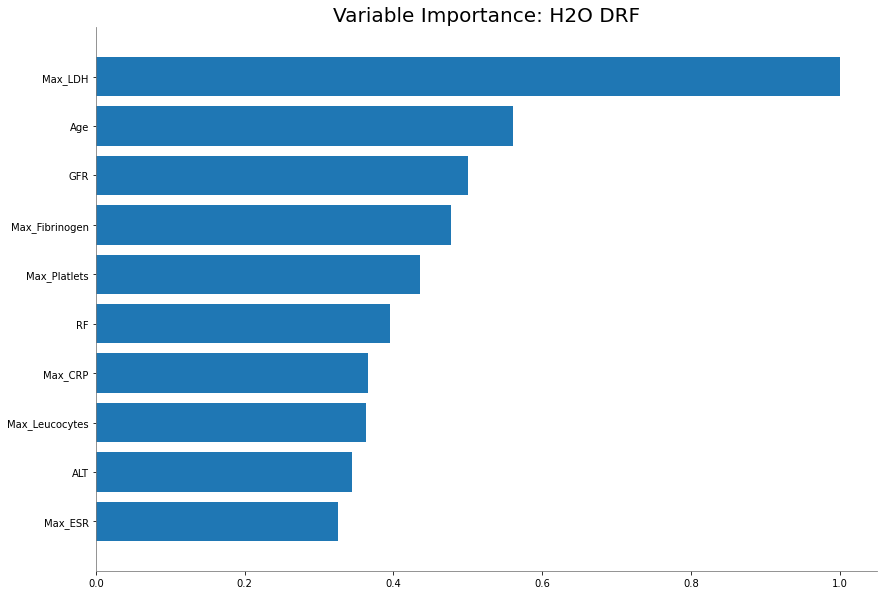

In [ ]:
drf.varimp_plot()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/parser/pn_cov_data.csv')

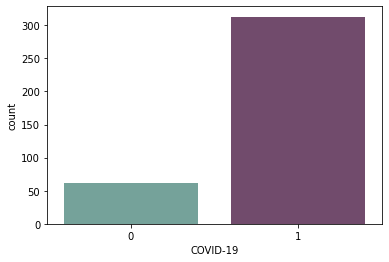

In [ ]:
#Посмотрим на баланс данных 
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["COVID-19"], palette= cols)

In [ ]:
neg, pos = np.bincount(df['COVID-19'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 375
    Positive: 313 (83.47% of total)



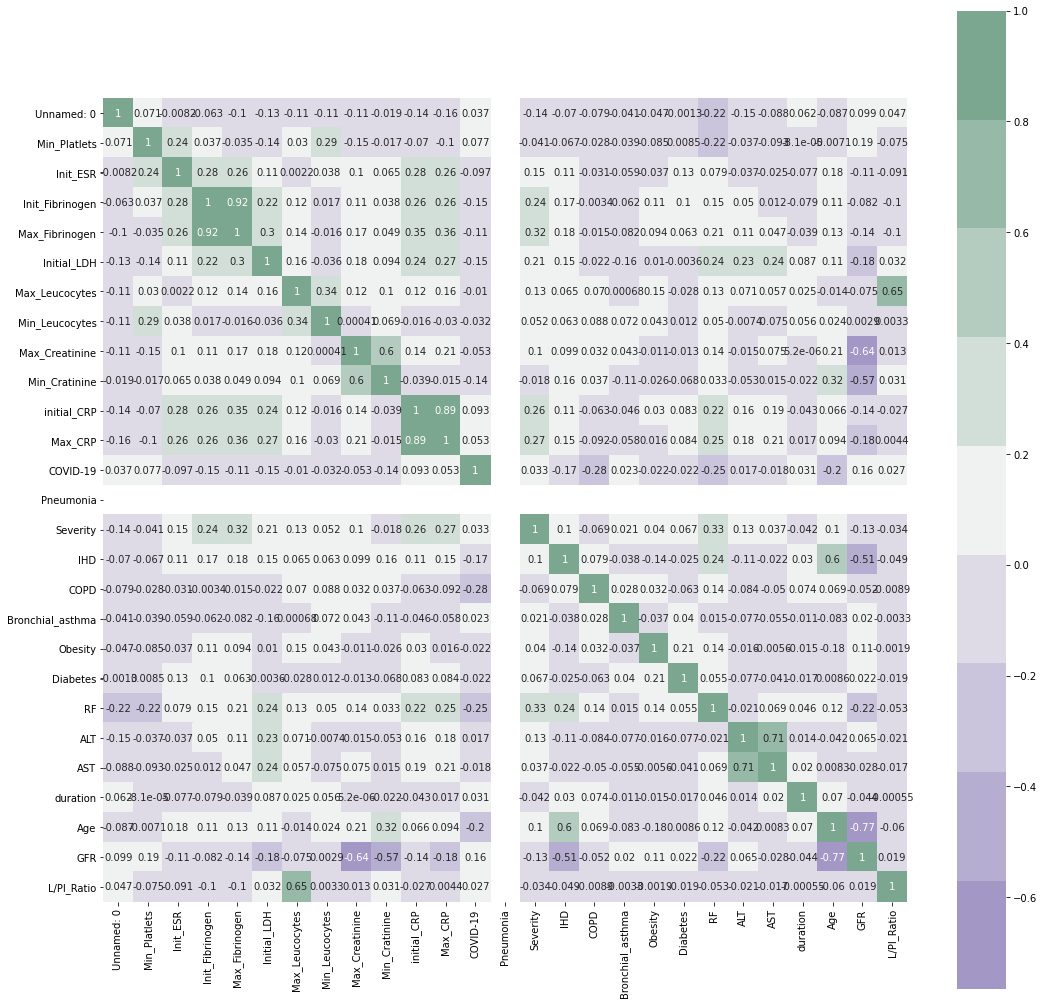

In [ ]:
#Построим корреляционную матрицу
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, cmap= cmap, annot=True, square=True);

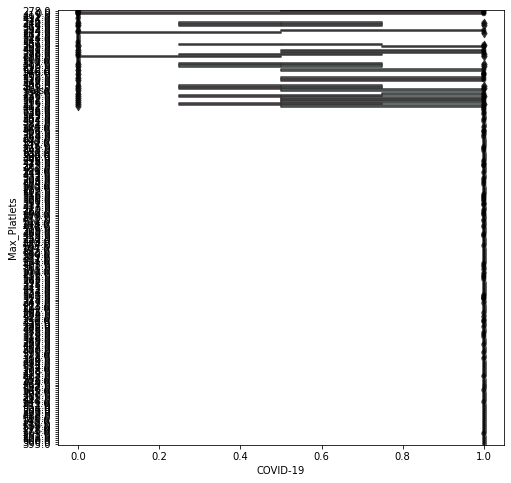

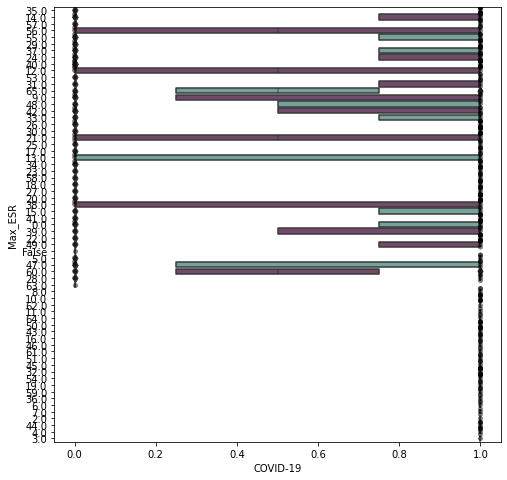

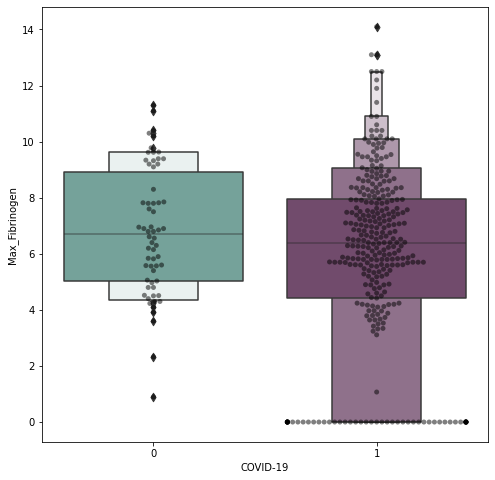

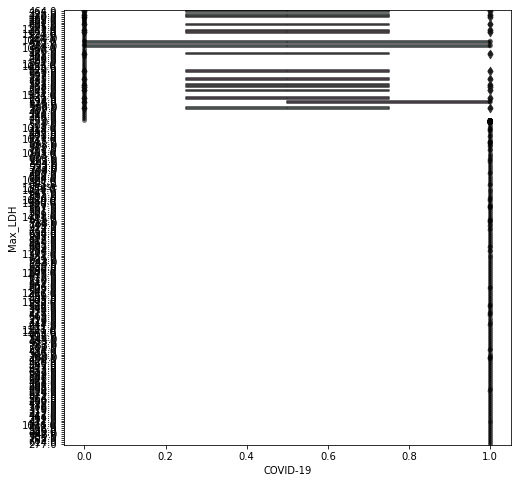

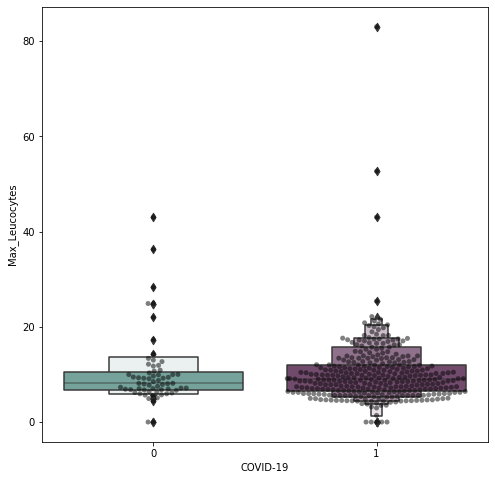

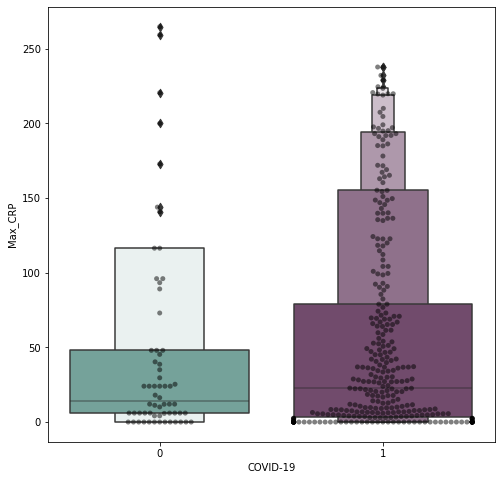

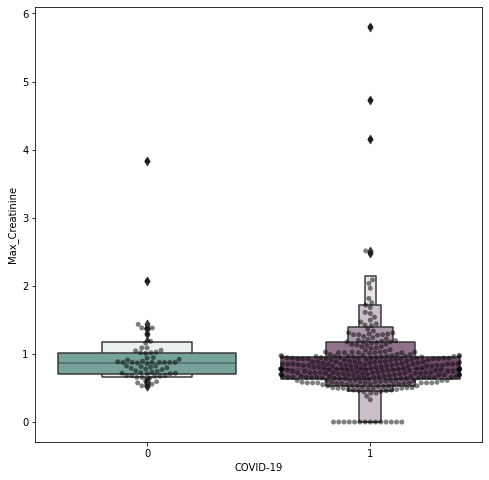

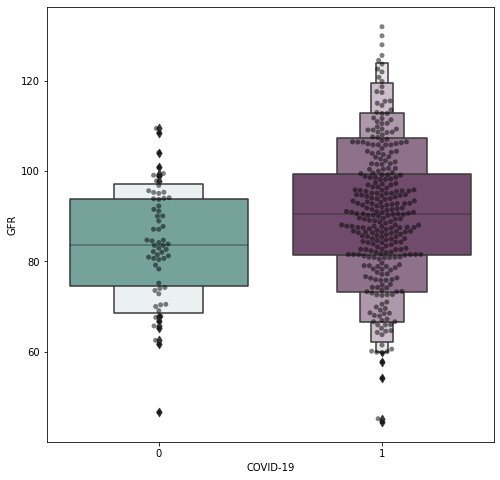

In [ ]:
# построим ящичковые диагнаммы с рассеянием
feature = ['Max_Platlets', 'Max_ESR', 'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',  'Max_CRP','Max_Creatinine','GFR']
for i in feature:
    plt.figure(figsize=(8,8))
    sns.swarmplot(x=df["COVID-19"], y=df[i], color="black", alpha=0.5)
    sns.boxenplot(x=df["COVID-19"], y=df[i], palette=cols)
    plt.show()

In [ ]:
df_c = df[df['COVID-19'] == 0]
df_p = df[df['COVID-19'] == 1]

In [ ]:
df_c['Max_Platlets'] = df_c['Max_Platlets'].map(lambda x: x == 0 if x == 'False' else x)

In [ ]:
df_c['Max_Platlets'].values

array(['278.0', '0.0', '419.0', '491.0', '434.0', '316.0', '240.0',
       '474.0', '369.0', '0.0', '293.0', '244.0', '235.0', '367.0',
       '514.0', '344.0', '0.0', '242.0', '551.0', '309.0', '299.0',
       '401.0', '339.0', '288.0', '230.0', '285.0', '218.0', '150.0',
       '387.0', '434.0', '418.0', '290.0', '613.0', '346.0', '235.0',
       '146.0', '0.0', '269.0', '0.0', '292.0', '250.0', '551.0', '0.0',
       '310.0', '0.0', '247.0', '498.0', '399.0', '405.0', False, '166.0',
       '229.0', '0.0', '369.0', '0.0', '236.0', '332.0', '285.0', '282.0',
       '256.0', '315.0', '412.0'], dtype=object)

In [ ]:
for i in columns:
  print(i, df_c[i].mean())

TypeError: ignored

In [ ]:
plt_no = []
for i in df_no_ind['Max_Platlets'].values:
  if i == False:
    pass
  elif float(i) > 0:
    
    plt_no.append(i)

In [ ]:
plt_y = []
for i in df_ind['Max_Platlets'].values:
  if i == False:
    pass
  elif float(i) > 0:
    
    plt_y.append(i)

In [ ]:
shapiro_test_y = stats.shapiro(plt_y)
shapiro_test_n = stats.shapiro(plt_no)

In [ ]:
shapiro_test_y

(0.99111008644104, 0.06241357699036598)

In [ ]:
shapiro_test_n

(0.958721935749054, 0.06889309734106064)

In [ ]:
columns =['Max_Platlets', 'Max_ESR', 'Max_Fibrinogen', 'Max_LDH',
       'Max_Leucocytes',  'Max_CRP','Max_Creatinine','GFR']

In [ ]:
dd = dd[(dd['Max_LDH'] >0) & (dd['Max_Fibrinogen'] > 0)]

In [ ]:
for i in columns:
  df[i] = df[i].map(lambda x: x == df_no_ind['Max_Platlets'].mean() if x == 'False' or 0 else x)
  df_ind[i] = df_ind[i].map(lambda x: x == df_ind['Max_Platlets'].mean() if x == 'False' or 0 else x)

In [ ]:
for i in columns:
  df_no_ind[i] = df_no_ind[i].map(lambda x: x == df_no_ind['Max_Platlets'].mean() if x == 'False' or 0 else x)
  df_ind[i] = df_ind[i].map(lambda x: x == df_ind['Max_Platlets'].mean() if x == 'False' or 0 else x)

In [ ]:
for i in columns:
  lst1 = df_no_ind[i]
  lst2 = df_ind[i]
  shapiro_test = stats.shapiro(np.float_(lst1)) # тест шапиро-уилка
  shapiro_test2 = stats.shapiro(np.float_(lst2)) # тест шапиро-уилка
  if shapiro_test[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test[1]))
  if shapiro_test2[1] < .05:
    print('Данные {0} распределены ненормально,\
           p-value - {1}'.format(i,  shapiro_test2[1]))
  else:
    pass

Данные Max_Platlets распределены ненормально,           p-value - 0.002688435837626457
Данные Max_Platlets распределены ненормально,           p-value - 0.004868579097092152
Данные Max_ESR распределены ненормально,           p-value - 0.00017691087850835174
Данные Max_Fibrinogen распределены ненормально,           p-value - 4.494680627686876e-09
Данные Max_LDH распределены ненормально,           p-value - 2.9378384169831406e-07
Данные Max_LDH распределены ненормально,           p-value - 7.335116021522925e-12
Данные Max_Leucocytes распределены ненормально,           p-value - 4.873187964271608e-10
Данные Max_Leucocytes распределены ненормально,           p-value - 6.69358782575603e-25
Данные Max_CRP распределены ненормально,           p-value - 4.331829062120818e-10
Данные Max_CRP распределены ненормально,           p-value - 2.9417327854604495e-20
Данные Max_Creatinine распределены ненормально,           p-value - 4.196328180772202e-12
Данные Max_Creatinine распределены ненормально,  

In [ ]:
for i in columns:
  print(i, np.float_(df_no_ind[i]).mean(),    
      df_no_ind[i].median(),
         np.float_(df_no_ind[i]).std(),
         #df_no_ind[i].quantile(.25),
         #np.float_(df_no_ind[i]).quantile(.75)
         )
  print(i, np.float_(df_ind[i]).mean(), 
         df_ind[i].median(),
         np.float_(df_ind[i]).std(),
         #df_ind[i].quantile(.25),
         #df_ind[i].quantile(.75)
         )


Max_Platlets 279.06451612903226 289.0 155.45281111266655
Max_Platlets 323.0894568690096 325.0 115.231555948388
Max_ESR 31.56451612903226 30.5 16.67296533772459
Max_ESR 31.17252396166134 30.0 15.943057990939536
Max_Fibrinogen 6.794983870967742 6.705 2.2384848021412327
Max_Fibrinogen 6.07523642172524 6.37 2.9018554263351533
Max_LDH 568.6774193548387 491.0 274.81329581123
Max_LDH 437.038338658147 453.0 341.89869928807235
Max_Leucocytes 10.353064516129033 8.115 7.33403413802889
Max_Leucocytes 10.143194888178915 8.95 6.746347208327579
Max_CRP 44.65967741935485 14.15 64.77930824974358
Max_CRP 54.23076677316294 22.7 66.7817861381039
Max_Creatinine 0.9313445618041678 0.8628318584070797 0.4543252231446177
Max_Creatinine 0.9016653001215755 0.8230088495575221 0.5026190181277911
GFR 83.75665370063784 83.69252117976464 12.368047309891658
GFR inf 90.57991613476028 nan


In [ ]:
  print(np.float_(df_no_ind['Max_Platlets']).mean(), 
                                              df_no_ind['Max_CRP'].median(),
                                              df_no_ind['Max_CRP'].std(),
                                              df_no_ind['Max_CRP'].quantile(.25),
                                              df_no_ind['Max_CRP'].quantile(.75))

279.06451612903226 14.15 65.3081277036521 5.85 48.0


In [ ]:
def Basic_statistics(lst_1, lst_2):
    """ 
    Функция "Базовые статистики"

    На вход получает 2 списка данных для сравнения.
    На выходе получаем p-values, при сравнении признаков. 
    В частности: показаны, не показаны антибиотики
    """
    res_mw = mannwhitneyu(np.float_(lst1), np.float_(lst2), 
                       use_continuity=True, 
                        alternative=None) # u -тест манна-уитни
    res_kw = kruskal(np.float_(lst1), np.float_(lst2))## краскела уолиса
    anova = stats.f_oneway(np.float_(lst1), np.float_(lst2)) #тест анова
    return res_mw[1], res_kw[1],  anova[1]
for col in columns:
  lst1 = df_no_ind[col]
  lst2 = df_ind[col]
  mw =  Basic_statistics(np.float_(lst1), np.float_(lst2))[0]
  kw =  Basic_statistics(np.float_(lst1), np.float_(lst2))[1]
  an =  Basic_statistics(np.float_(lst1), np.float_(lst2))[2]
  if mw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Манна-Уитни'.format(col,  mw))
  if kw < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Крускала-Уоллиса'.format(col,  kw))
  if an < .05:
    print('Данные {0} статисически значимо различаются в подгруппах,\
           p-value - {1}, тест Анова'.format(col,  an))
  else:
    pass


Данные Max_Platlets статисически значимо различаются в подгруппах,           p-value - 0.028545693544446867, тест Манна-Уитни
Данные Max_Platlets статисически значимо различаются в подгруппах,           p-value - 0.010490188760581122, тест Анова
Данные Max_LDH статисически значимо различаются в подгруппах,           p-value - 0.01681511046658479, тест Манна-Уитни
Данные Max_LDH статисически значимо различаются в подгруппах,           p-value - 0.03357633281440354, тест Крускала-Уоллиса
Данные Max_LDH статисически значимо различаются в подгруппах,           p-value - 0.004658874642465464, тест Анова
Данные GFR статисически значимо различаются в подгруппах,           p-value - 0.0002278053149156146, тест Манна-Уитни
Данные GFR статисически значимо различаются в подгруппах,           p-value - 0.000454514358168385, тест Крускала-Уоллиса


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        375 non-null    int64  
 1   Max_Platlets      375 non-null    object 
 2   Min_Platlets      375 non-null    float64
 3   Init_ESR          375 non-null    float64
 4   Max_ESR           375 non-null    object 
 5   Init_Fibrinogen   375 non-null    float64
 6   Max_Fibrinogen    375 non-null    object 
 7   Initial_LDH       375 non-null    float64
 8   Max_LDH           375 non-null    object 
 9   Max_Leucocytes    375 non-null    object 
 10  Min_Leucocytes    375 non-null    float64
 11  Hemoglobin        375 non-null    object 
 12  Max_Creatinine    375 non-null    object 
 13  Min_Cratinine     375 non-null    float64
 14  Gender            375 non-null    object 
 15  initial_CRP       375 non-null    float64
 16  Max_CRP           375 non-null    object 
 1